# **MVP NBA temporada 2016-17**

A lo largo de este trabajo, se analizarán algunos aspectos de los playoffs de la temporada 2016-17 con la intención de comparar el desempeño de los 2 jugaodres franquicia que disputaron las finales de la temporada. En este caso se trata de **Kevin Durant** por parte de los GSW (ganodor del MVP de la finales) vs **Lebron James** por parte de los Cavaliers. Los aspectos que se examinaran serán los siguientes:

+ Estadisticas relevantes durante los playoffs de la temporada 2016-17.
+ Gráficas de zonas de tiro para ambos jugadores.
+ Medidas de centralidad para los equipos finalistas (GSW vs CLE).
+ Análisis de redes para ambos equipos.

Aunado a esto, utilizando el análisis de redes, se compararán los siguientes aspectos:

+ Estructura de la red para un equipo a lo largo de diversas temporadas (impacto de la partida de uno de los jugadores estrella del equipo)
+ Estrcutura de la red para la temporada regular y los playoffs.
+ Estrcutura de la red del equipo del ganador del MVP en temporada regular (¿Por que no llegó a la final, teniendo al mejor jugador de la liga?)

### **Un poco de contexto**

En los últimos 5 años de la NBA se ha presentado una de las más grandes rivalidades de la historia de la liga. Durante cuatro años, de 2015 a 2019, las finales fueron protagonizados por el equipo de Oakland, Golden State Warriors (GSW), y el de Cleveland, Cavaliers (CLE). Por un lado en 2014 GSW presentaba un equipo sólido y dinámico basado en su tridente Stephen Curry, Klay Thompson y Draymond Green, a quienes dos años más tarde se uníria Kevin Durant (Jugador top 5 de la liga). Por otro lado CLE presentaba un tridente conformado por Lebron James (considerado el mejor jugador de la liga en ese entonces), Kyrie Irving y Kevin Love. Durante estos 4 años GSW fue dominante ganando 3 de los 4 títulos disputados, perdiendo únicamente las finales de la temporada 2015-16 con la remontada histórica de 3-1 por parte de CLE.
Aunque los 3 títulos de GSW fueron ganados de manera aplastante, hay quienes afirman que los números de Lebron James merecían que CLE ganará más campeonatos y el MVP de la finales. Estas ideas motivan el presente trabajo******

<img src="Playoffs_16-17.png">

### **Algunas estadísticas relevenate de los playoffs de la  temporada 2016-17**

A continuación se presentan diversas gráficas con ciertas estadísticas específicas de los jugadores en cuestión, las cuales presentan información valiosa sobre el desempeño de estos jugadores durante los playoffs de la temporada 2016-17 de la NBA.


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import json
from nba_api.stats.endpoints import leagueleaders
from nba_api.stats.endpoints import shotchartdetail
import Utileria as ut
pd.set_option('display.max_columns', 500)

/home/miguelmillan13/Documentos/Programas/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Se obtiene las estadísticas de los líderes de la liga a través de la api de la nba, indicando la temporada y los playoffs
response = leagueleaders.LeagueLeaders(
    season='2016-17',
    season_type_all_star='Playoffs'
)
df = response.get_data_frames()[0]
#df

#### **Eficiencia**
Dentro de las estadísticas de la NBA existe una conocida como eficiencia (EFF), la cual es utilizada para comparar el valor global de los jugadores. Es una estadística compuesta que se deriva de las estadísticas individuales básicas: puntos, rebotes, asistencias, robos, bloqueos, giros e intentos de disparo. En teoría la EFF, tiene en cuenta tanto las contribuciones ofensivas de un jugador (puntos, asistencias) como sus contribuciones defensivas (robos, bloqueos), pero debido a que la defensa es difícil de cuantificar con las estadísticas actualmente tabuladas, ésta tiende a favorecer a los jugadores ofensivos. La EFF viene dada por la formula:

*EFF =(PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP*

A continuación se presenta dicha estadística para el top 10 de jugadores de los playoffs de la temporada 2016-17:

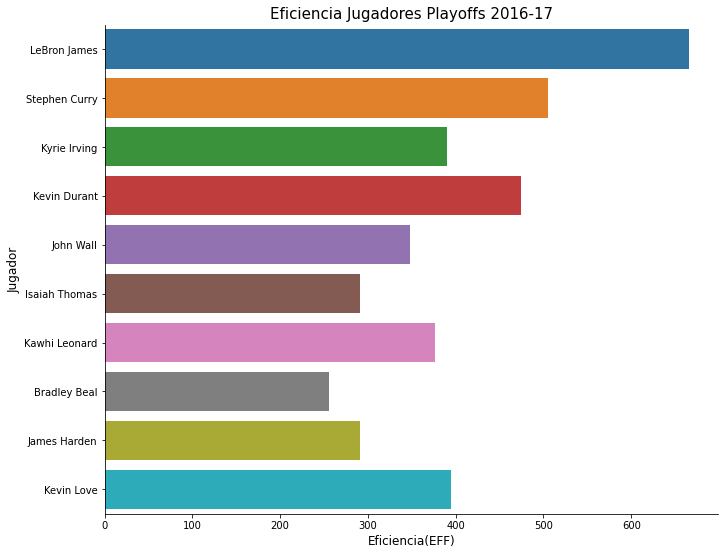

In [3]:
ut.grafica_eff(df)

#### **Asistencias y Anotaciones en la temporada 2016-17**
Se presenta un gráfico con las anotaciones (eje x) contra las asistencias (eje y) realizadas durante los playoffs de la temporada 2016-17.
Por temas de visualización únicamente se observan el top 20 de los mejores jugadores en estas estadśiticas de la temporada.
*Nota: Se debe aclarar que asistencia unicamente es contada si el pase genera canasta.

In [4]:
ut.df_api_lideres('2016-17','Playoffs')

,PLAYER_ID,RANK,PLAYER,TEAM,AST,PTS
0,2544,1,LeBron James,CLE,141,591
1,201939,2,Stephen Curry,GSW,114,477
2,202681,3,Kyrie Irving,CLE,95,466
3,201142,4,Kevin Durant,GSW,64,428
4,202322,5,John Wall,WAS,134,353
5,202738,6,Isaiah Thomas,BOS,100,349
6,202695,7,Kawhi Leonard,SAS,55,332
7,203078,8,Bradley Beal,WAS,35,323
8,201935,9,James Harden,HOU,93,313
9,201567,10,Kevin Love,CLE,30,303


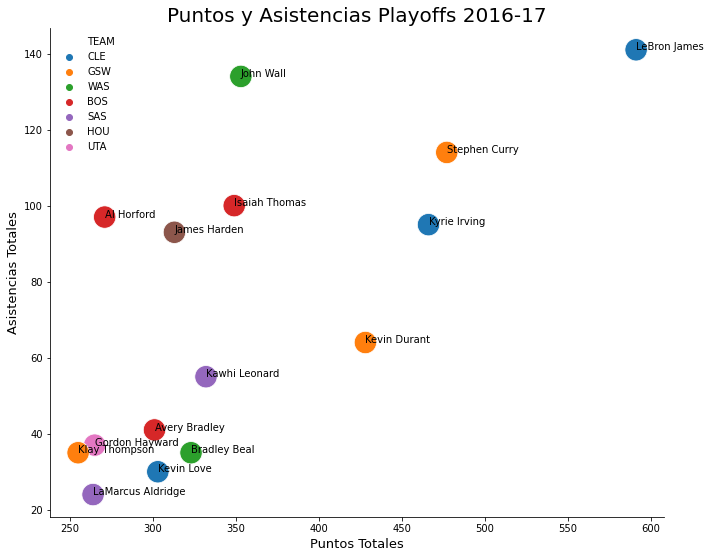

In [5]:
ut.grafica_confeti(df)

Al observar la gráfica es evidente que durante esta temporada Lebron James lidera en ambos aspectos del juego. El jugador más cercano a él es Stephen Curry y es interesante apuntar que aún Curry jugando como base del equipo, James lo supera en asistencias. Por otro lado el MVP de las finales,Kevin Durant, se queda bastante lejos de Lebron en ambos aspectos.

#### **Porcentaje de tiros de media y de 3 puntos**

Otra de las estadisticas interesantes que se utilizan mucho en la NBA es el porcentaje de tiros de media encestados (FG%) y el porcentaje de tiros de tres puntos encesatados(3FG%).Éstas estadísticas nos da una idea de que tan eficaz es un jugador dentro de la cancha. Se presenta una gráfica con estos datos para el top 15 de jugadores de los playoffs de la temporada 2016.17

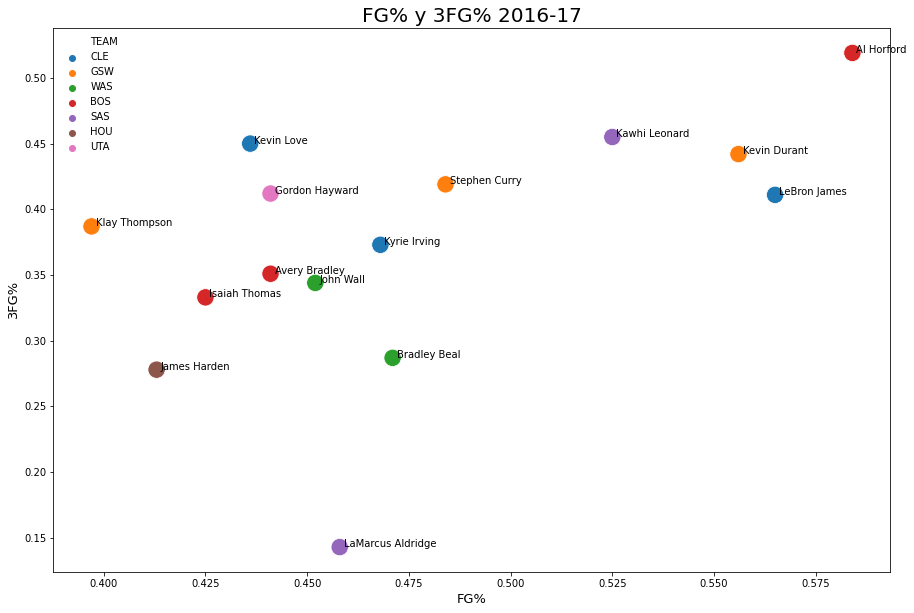

In [6]:
ut.grafica_FG(df)

Conclusiones

#### **Principales zonas de tiro de los jugadores analizados**
A continuación se presenta un gráfico de las zonas en las que los jugadores presentan la mayoría de sus tiros al aro (**REVISAR SI ES ÚNICAMENTE DONDE ENCESTAN). Puntualmente se hace el comparativo enter Lebron James (CLE) y Kevin Durant(GSW). De esta forma se puede observar la versatilidad del jugador para anotar en cualquier punto de la cancha.

In [37]:
response = shotchartdetail.ShotChartDetail(
    team_id=0,
    player_id=2544,
    season_nullable='2016-17',
    season_type_all_star='Playoffs'
)

content = json.loads(response.get_json())

Conclusiones del análisis:

### **Análisis de redes y medidas de centralidad**

Se presenta un análisis de redes con el objetivo de investigar la interconexión de un equipo, dando una idea de cómo juega el equipo. Además, este analisis sirve para identificar a los jugadores más "conectados" dentro de cada equipo, arrojando a los jugadores fundamentales del equipo. Otra de las preguntas que se planeas resolver en este anpalsiis son las siguientes:

+ 1) ¿Existen cambios en la estructura de la red del equipo durante juegos de temporada regular contra juegos de playoffs?
+ 2) ¿Qué le sucede a la red cuando uno de sus jugadores estrella abandona el equipo?
+ 3) ¿Existe diferencia entre la estructura de la red de un equipo finalista y un equipo con una super estrella?


Para responder a la pregunta 1) se analizará la estructura de redes de los dos equipos finalistas a lo largo de la temporada regular y durante los playoffs de la temporada 2016-2017. Dado que el nivel de exigencia es mayor durante los playoffs, se espera que la estructura de la red del equipo sufra algún cambio, pudiendo ser que los jugadores estrella carguen más al equipo o que el juega se distribuya más equitativamente entre el rooster del equipo.

Conclusiones del análisis:

En ambos casos se ve claro que los nodos más grandes y con conexiones más fuertes son el tridente de estrellas que presenta el equipo (Lebron James, Kyrie Irving y Kevin Love), junto con Thomson (jugador del cuadro titular). Por un lado se observa una mayor cantidad de conexiones y nodos más grandes en la gráfica de temporada regular, esto se debe al mayor número de partidos jugados durante la temporada regular.En la red de temporada regular se presenta al cuadro titular en el centro, con las aristas sumamente densas  

Durante los años 2011-2017 uno de los jugadores pilares de CLE fue Kyrie Irving. Elegido número 1 del draft de la NBA por CLE, Kyrie llegó para volver a poner a CLE en el mapa luego de la salida de Lebron James un año antes. A partir de la temporada 2014-15 y hasta la 2016-17, Kyrie Irving y Lebron James hicieron una buena mancuerna de superestrellas en CLE, llevandolos a las 3 finales y ganando un anillo de campeón en esos 3 años. A la temporada siguiente (2017-18) Kyrie abandonó a Cle para formar parte del equipo historico de Boston.
Para responder la pregunta 2) se comparará el comportamiento de la red del equipo de CLE con Kyrie en el rooster(temporada 2016-17) y sin él (temporada 2017-18). Se espera observar mayor protagonismo de algún otro jugador del roster de CLE o incluso un acaparamiento total de parte de Lebron James.

Conclusiones del análisis

Una de las máximas estrellas que ha tenido la NBA en los últimos 5 años es Russel Westbrook. Con promedio de puntos y asistencias históricas y rompiendo el record de más triples-dobles en una sola temporada al conseguir 42; Westbrook fue acreedor al MVP de la temporada regular 2016-17. Lo curioso es que su equipo, Oklahoma (OKC), fue eliminado en la primer ronda de los playoffs por los Rockets de Houston. Esto confirma que aún con el jugador más valiosa dentro de un equipo, no se garantiza el campeonato. Con esta idea se resolverá la pregunta 3), contrastando las redes de OKC contra las de los finalistas. Se espera observar un mayor equilibrio por parte de los finalistas, mientras un equipo complemtante cargado hacia Westbrook por parte de OKC.

Conclusiones del análisis:

+ Por que son no dirigidas las gráficas: son igual de importantes las asistencais que la anotación.
+ Por que agarra el peso como el reciproco: tiene que ver con la distancia.